# **🔷 Title: Image Processing Basics with OpenCV**

✅ This script:
- Reads an online image
- Resizes it
- Splits and modifies RGB channels
- Clips pixel values
- Modifies a specific region
- Demonstrates adding brightness

**Author: Wasiq**



In [ ]:
import cv2
import numpy as np
import urllib.request
from google.colab.patches import cv2_imshow

In [ ]:
url = 'https://ultralytics.com/images/bus.jpg'

In [ ]:
res=urllib.request.urlopen(url)
print(res)

# resp contains binary data of the image.

In [ ]:
image=np.asarray(bytearray(res.read()),dtype=np.uint8)


# ✔️ Converts the binary data to a numpy array of type uint8 (image pixels).

# resp.read() reads all data from URL response.
# bytearray(...) converts data into byte array.
# np.asarray(...) converts it to a numpy array.

In [ ]:
img=cv2.imdecode(image,cv2.IMREAD_COLOR)

# Decodes the numpy array into an actual image format readable by OpenCV.
# cv2.imdecode converts encoded image data (jpg/png) into an OpenCV BGR image array.

In [ ]:
print(img.shape)

(1080, 810, 3)


In [ ]:
resized_img=cv2.resize(img,(400,400),interpolation=cv2.INTER_CUBIC)

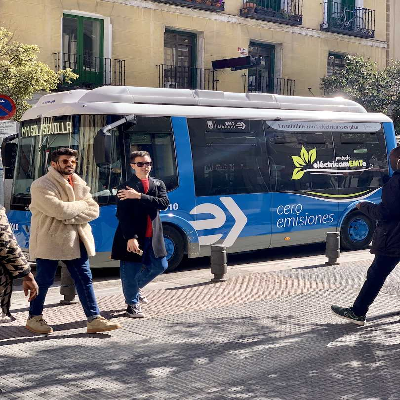

In [ ]:
cv2_imshow(resized_img)

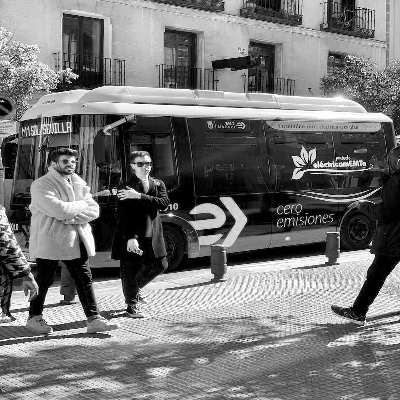

In [ ]:
b,g,r=cv2.split(resized_img)
cv2_imshow(r)

# to split image in its channels

In [ ]:
def increase_brightness(image, value):
    return np.clip(image + value, 0, 255).astype(np.uint8)
r_new = increase_brightness(r, 20)
g_new = increase_brightness(g, 20)
b_new = increase_brightness(b, 20)

print(g_new.shape)
# to modify the pixels

(400, 400)


In [ ]:
rgb_image=cv2.merge((r_new,g_new,b_new))
if (rgb_image > 255).any():
    print("requires clip function")

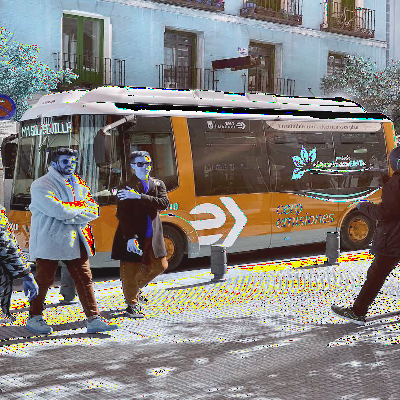

In [ ]:
cliped_rgb=np.clip(rgb_image,0,255)
cv2_imshow(cliped_rgb)

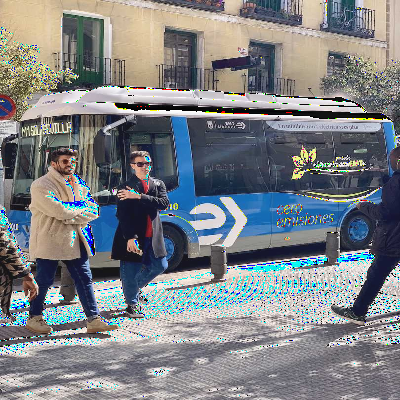

In [ ]:
bgr=cv2.cvtColor(cliped_rgb,cv2.COLOR_RGB2BGR)
cv2_imshow(bgr)

In [ ]:
print(bgr.shape)

(400, 400, 3)


(40, 40)
[[247 247 247 ... 158 160 147]
 [245 246 247 ... 159 159 147]
 [244 245 247 ... 153 161 147]
 ...
 [207 251 178 ...  40 112 123]
 [201  27 185 ... 167 119 122]
 [ 21 183 243 ... 115 167 130]]


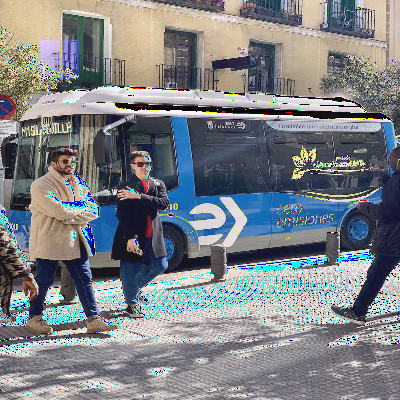

In [ ]:
mask=bgr[40:80,40:80,0]
print(mask.shape)
new_mask=mask+40
clipped=np.clip(new_mask,0,255)
print(new_mask)
bgr[40:80,40:80,0]=clipped
cv2_imshow(bgr)

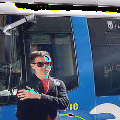

In [ ]:
coropped_img=bgr[100:220,100:220]
cv2_imshow(coropped_img)

In [ ]:
max_pixel=np.max(bgr)
print(max_pixel)

255


In [ ]:
print(cliped_rgb)

[[[193 167 141]
  [200 175 145]
  [210 185 154]
  ...
  [208 191 181]
  [208 191 181]
  [207 190 180]]

 [[199 173 146]
  [201 176 146]
  [204 179 149]
  ...
  [208 191 181]
  [208 191 181]
  [207 190 180]]

 [[195 168 142]
  [199 174 144]
  [204 179 149]
  ...
  [208 191 181]
  [207 190 180]
  [207 190 180]]

 ...

 [[154 150 151]
  [138 134 135]
  [173 169 171]
  ...
  [131 125 135]
  [113 107 117]
  [105  99 109]]

 [[177 173 174]
  [189 185 186]
  [193 189 190]
  ...
  [157 151 161]
  [128 122 132]
  [140 134 144]]

 [[185 181 182]
  [216 212 213]
  [190 186 187]
  ...
  [111 105 115]
  [116 110 120]
  [116 110 120]]]


In [ ]:
ones=np.ones(resized_img.shape)*10
print(ones)

[[[10. 10. 10.]
  [10. 10. 10.]
  [10. 10. 10.]
  ...
  [10. 10. 10.]
  [10. 10. 10.]
  [10. 10. 10.]]

 [[10. 10. 10.]
  [10. 10. 10.]
  [10. 10. 10.]
  ...
  [10. 10. 10.]
  [10. 10. 10.]
  [10. 10. 10.]]

 [[10. 10. 10.]
  [10. 10. 10.]
  [10. 10. 10.]
  ...
  [10. 10. 10.]
  [10. 10. 10.]
  [10. 10. 10.]]

 ...

 [[10. 10. 10.]
  [10. 10. 10.]
  [10. 10. 10.]
  ...
  [10. 10. 10.]
  [10. 10. 10.]
  [10. 10. 10.]]

 [[10. 10. 10.]
  [10. 10. 10.]
  [10. 10. 10.]
  ...
  [10. 10. 10.]
  [10. 10. 10.]
  [10. 10. 10.]]

 [[10. 10. 10.]
  [10. 10. 10.]
  [10. 10. 10.]
  ...
  [10. 10. 10.]
  [10. 10. 10.]
  [10. 10. 10.]]]


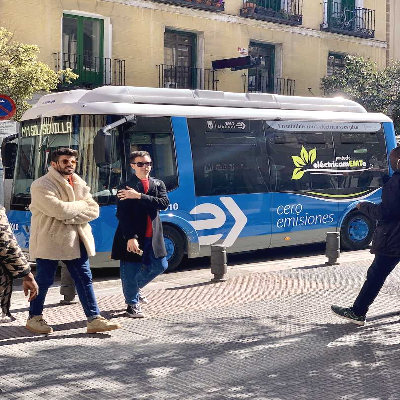

In [ ]:
high_brightness = np.clip(np.add(resized_img, ones), 0, 255).astype(np.uint8)
cv2_imshow(high_brightness)